# ***Sales Forecasting of Pipeline***

Sales forecasting using a pipeline dataset involves predicting future sales based on historical data of opportunities within the sales funnel. The dataset typically contains information such as opportunity IDs, lead sources, stages, estimated revenue, and expected close dates. By analyzing this data, companies can make informed predictions about future sales performance. This helps in resource allocation, managing sales targets, and optimizing the sales process.

Data preprocessing is a critical step before building any forecasting model. It includes cleaning the dataset by removing irrelevant columns, converting data into appropriate formats (e.g., dates and currency), and normalizing features if required. Handling missing values is essential as some data points, like the expected close date or revenue, may be incomplete. Techniques like imputation (mean, median, mode) or using algorithms to predict missing values can be applied. Deduplication ensures that there are no repeated entries for the same opportunity, which could otherwise skew the analysis.

To understand the dataset better, univariate, bivariate, and multivariate analysis techniques are employed. Univariate analysis looks at single variables to study distributions (e.g., revenue per deal), bivariate analysis explores relationships between two variables (e.g., deal stage vs. close probability), and multivariate analysis examines interactions among multiple variables (e.g., how lead source, stage, and interaction history collectively influence win rates). These techniques help uncover patterns and correlations that can enhance forecasting accuracy.

# **loading libraries and data**

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns

reading two datasets


In [27]:
data = pd.read_csv('gdrive/My Drive/edab/sales-pipeline.csv')
cat_data = pd.read_csv('gdrive/My Drive/edab/sales-pipeline.csv')

displaying 1st 10 values

In [18]:
data.head(10)

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,04-01-2016,24-05-2016,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,04-01-2016,02-11-2016,303
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,06-01-2016,07-12-2016,336
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,06-01-2016,11-09-2016,249
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,06-01-2016,18-09-2016,256
5,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180,07-01-2016,31-01-2016,24
6,Hatfan,PE84CX4O,Zane Levy,zane@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,517,08-01-2016,08-12-2016,335
7,Y-corporation,GIUUTBXM,Kary Hendrixson,kary@piedpiper.com,rosanne@y-corporation.com,Won,GTXPro,5539,10-01-2016,03-12-2016,328
8,Gogozoom,C20AVXN7,Darcel Schlecht,darcel@piedpiper.com,salina@gogozoom.com,Won,GTXPro,4359,10-01-2016,28-01-2016,18
9,Kinnamplus,VR9NYBOV,Garret Kinder,garret@piedpiper.com,monte@kinnamplus.com,Won,MG Special,41,11-01-2016,29-12-2016,353


.info() functions to display total number of non-null datapoints in each column and their datatype.

In [19]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Account            8800 non-null   object
 1   Opportunity_ID     8800 non-null   object
 2   Sales_Agent        8800 non-null   object
 3   SalesAgentEmailID  8800 non-null   object
 4   ContactEmailID     8800 non-null   object
 5   Deal_Stage         8800 non-null   object
 6   Product            8800 non-null   object
 7   Close_Value        8800 non-null   int64 
 8   Created Date       8800 non-null   object
 9   Close Date         8800 non-null   object
 10  DateDiff           8800 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 756.4+ KB


# **DATA DEDUPLICATION**

In [20]:
# Import pandas
import pandas as pd

# Sample DataFrame based on your provided data
data = {
    'Account': ['Konex', 'Finjob', 'Kinnamplus', 'Genco Pura Olive Oil Company', 'Initech',
                'Stanredtax', 'Hatfan', 'Y-corporation', 'Gogozoom', 'Kinnamplus'],
    'Opportunity_ID': ['3KR50X38', 'YFS5KLJJ', 'N0ONCYVZ', 'IBEUTCSW', 'G8AO5FA2',
                       '2V848WZD', 'PE84CX4O', 'GIUUTBXM', 'C20AVXN7', 'VR9NYBOV'],
    'Sales_Agent': ['Corliss Cosme', 'Rosalina Dieter', 'Donn Cantrell', 'James Ascencio', 'Wilburn Farren',
                    'Lajuana Vencill', 'Zane Levy', 'Kary Hendrixson', 'Darcel Schlecht', 'Garret Kinder'],
    'SalesAgentEmailID': ['corliss@piedpiper.com', 'rosalina@piedpiper.com', 'donn@piedpiper.com', 'james@piedpiper.com',
                          'wilburn@piedpiper.com', 'lajuana@piedpiper.com', 'zane@piedpiper.com', 'kary@piedpiper.com',
                          'darcel@piedpiper.com', 'garret@piedpiper.com'],
    'ContactEmailID': ['delila@konex.com', 'belinda@finjob.com', 'monte@kinnamplus.com', 'karole@gencopuraoliveoilcompany.com',
                       'alejandro@initech.com', 'candice@stanredtax.com', 'tyron@hatfan.com', 'rosanne@y-corporation.com',
                       'salina@gogozoom.com', 'monte@kinnamplus.com'],
    'Deal_Stage': ['Won', 'Won', 'Lost', 'In Progress', 'Lost', 'Won', 'Won', 'Won', 'Won', 'Won'],
    'Product': ['GTX Plus Basic', 'MG Special', 'MG Special', 'MG Advanced', 'MG Advanced', 'MG Advanced',
                'GTX Basic', 'GTXPro', 'GTXPro', 'MG Special'],
    'Close_Value': [1255, 45, 1054, 1054, 517, 3180, 517, 5539, 4359, 41],
    'Created Date': ['04-01-2016', '04-01-2016', '06-01-2016', '06-01-2016', '06-01-2016', '07-01-2016',
                     '08-01-2016', '10-01-2016', '10-01-2016', '11-01-2016'],
    'Close Date': ['24-05-2016', '02-11-2016', '07-12-2016', '11-09-2016', '18-09-2016', '31-01-2016',
                   '08-12-2016', '03-12-2016', '28-01-2016', '29-12-2016'],
    'DateDiff': [141, 303, 336, 249, 256, 24, 335, 328, 18, 353]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display original DataFrame
print("Original DataFrame:")
print(df)

# Identify duplicate Opportunity_IDs
duplicates = df[df.duplicated(subset=['Opportunity_ID'], keep=False)]

# Calculate the mean Close_Value for each duplicated Opportunity_ID
mean_values = duplicates.groupby('Opportunity_ID')['Close_Value'].transform('mean')

# Replace the Close_Value of duplicates with the calculated mean
df.loc[duplicates.index, 'Close_Value'] = mean_values

# Drop duplicate Opportunity_IDs if needed (keep='first' will retain the first instance)
df = df.drop_duplicates(subset=['Opportunity_ID'])

# Display the DataFrame after replacing duplicates with mean values
print("\nDataFrame after replacing duplicate Close_Value with mean values:")
print(df)


Original DataFrame:
                        Account Opportunity_ID      Sales_Agent  \
0                         Konex       3KR50X38    Corliss Cosme   
1                        Finjob       YFS5KLJJ  Rosalina Dieter   
2                    Kinnamplus       N0ONCYVZ    Donn Cantrell   
3  Genco Pura Olive Oil Company       IBEUTCSW   James Ascencio   
4                       Initech       G8AO5FA2   Wilburn Farren   
5                    Stanredtax       2V848WZD  Lajuana Vencill   
6                        Hatfan       PE84CX4O        Zane Levy   
7                 Y-corporation       GIUUTBXM  Kary Hendrixson   
8                      Gogozoom       C20AVXN7  Darcel Schlecht   
9                    Kinnamplus       VR9NYBOV    Garret Kinder   

        SalesAgentEmailID                       ContactEmailID   Deal_Stage  \
0   corliss@piedpiper.com                     delila@konex.com          Won   
1  rosalina@piedpiper.com                   belinda@finjob.com          Won   
2    

# **checking for missing values**






<Axes: >

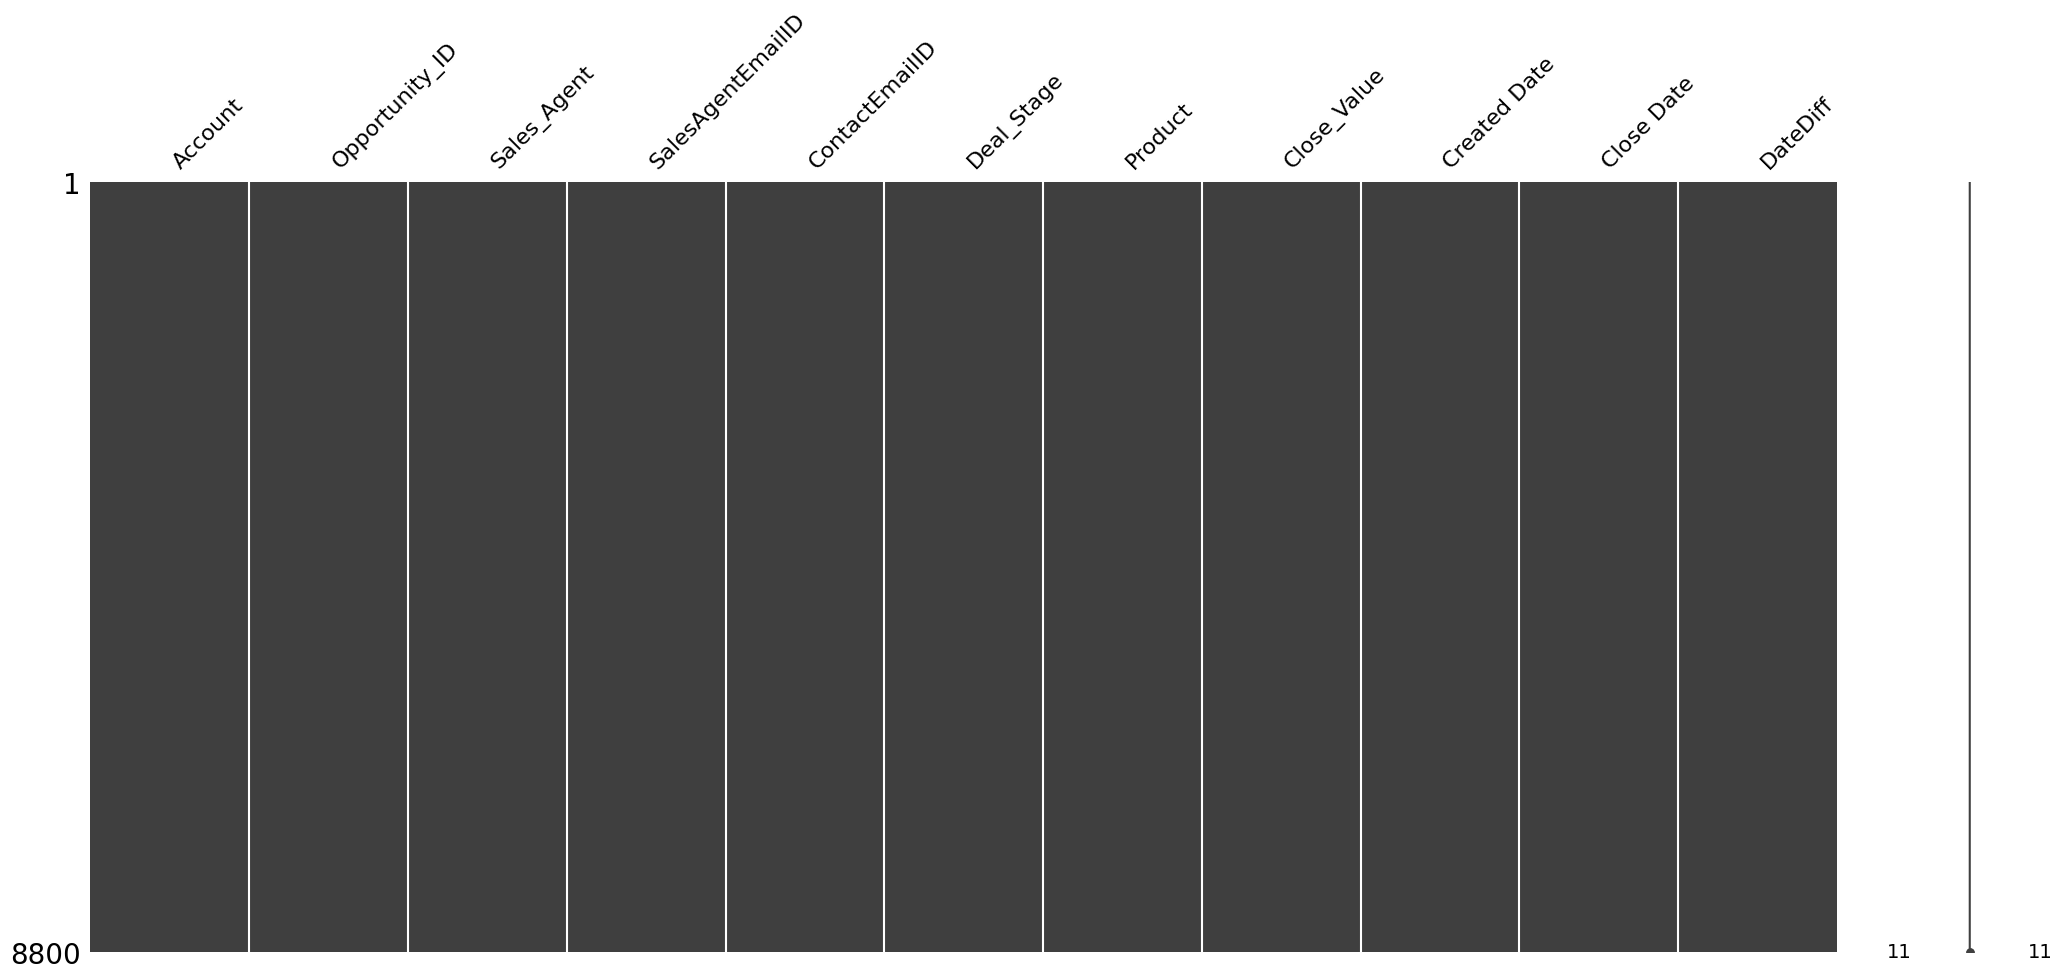

In [28]:
import missingno as msno
msno.matrix(data)


in barchart

<Axes: >

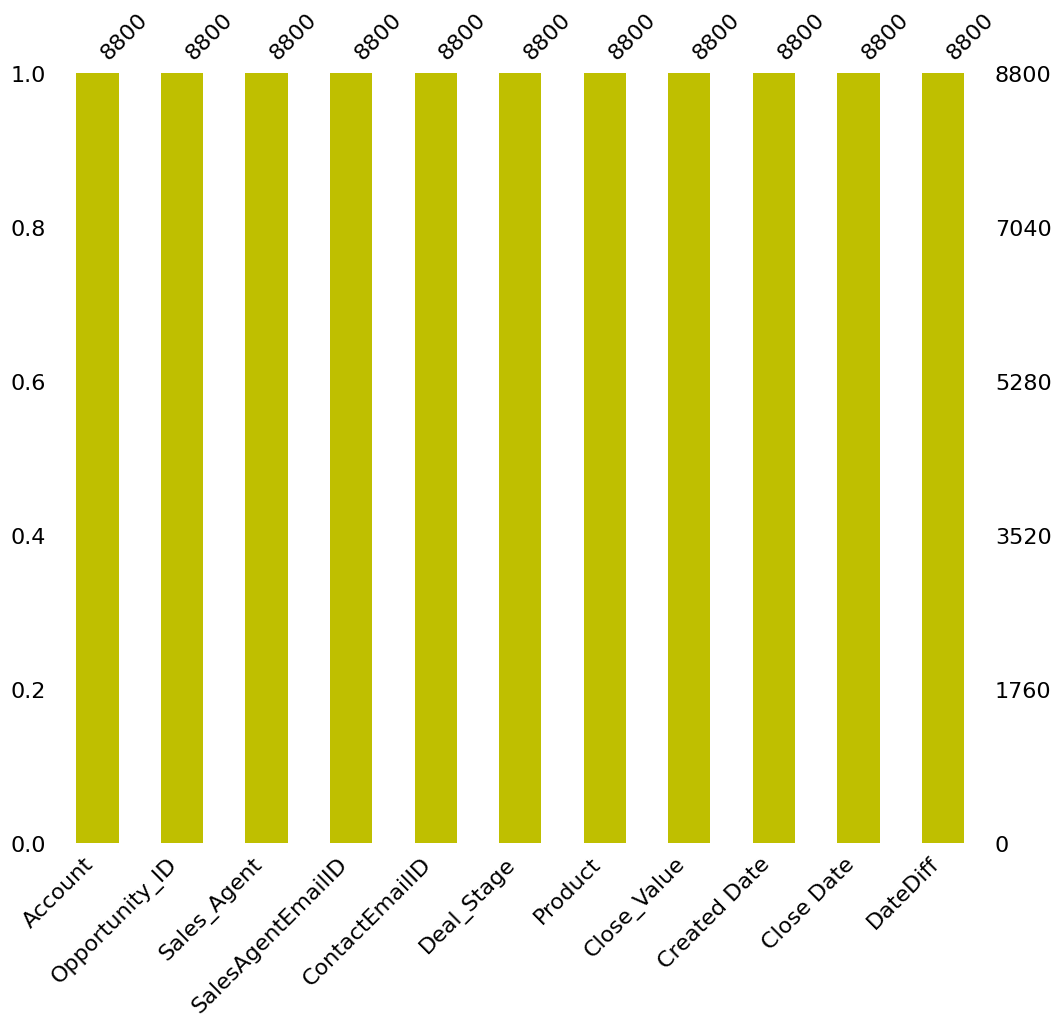

In [29]:

msno.bar(data, color = 'y', figsize = (12,10))

**heatmap** is to display the correlation of missingness between every 2 column.

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

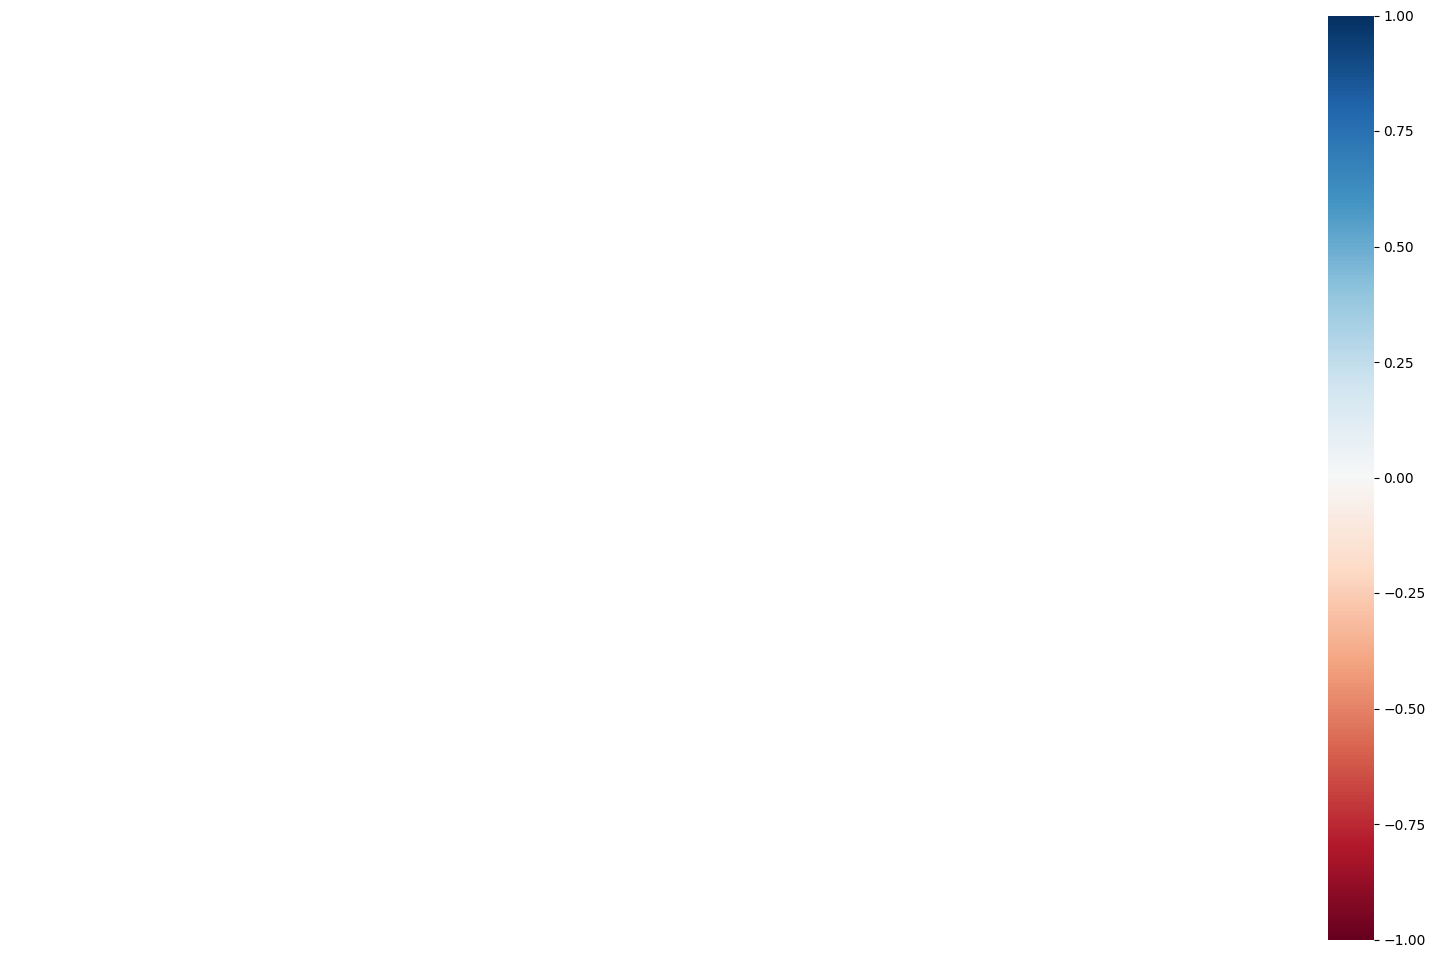

In [ ]:
msno.heatmap(data)

**dendogram plot **

it is a tree diagram of missingness that reveals trends deeper than the pairwise ones visible in the correlation heatmap.




/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


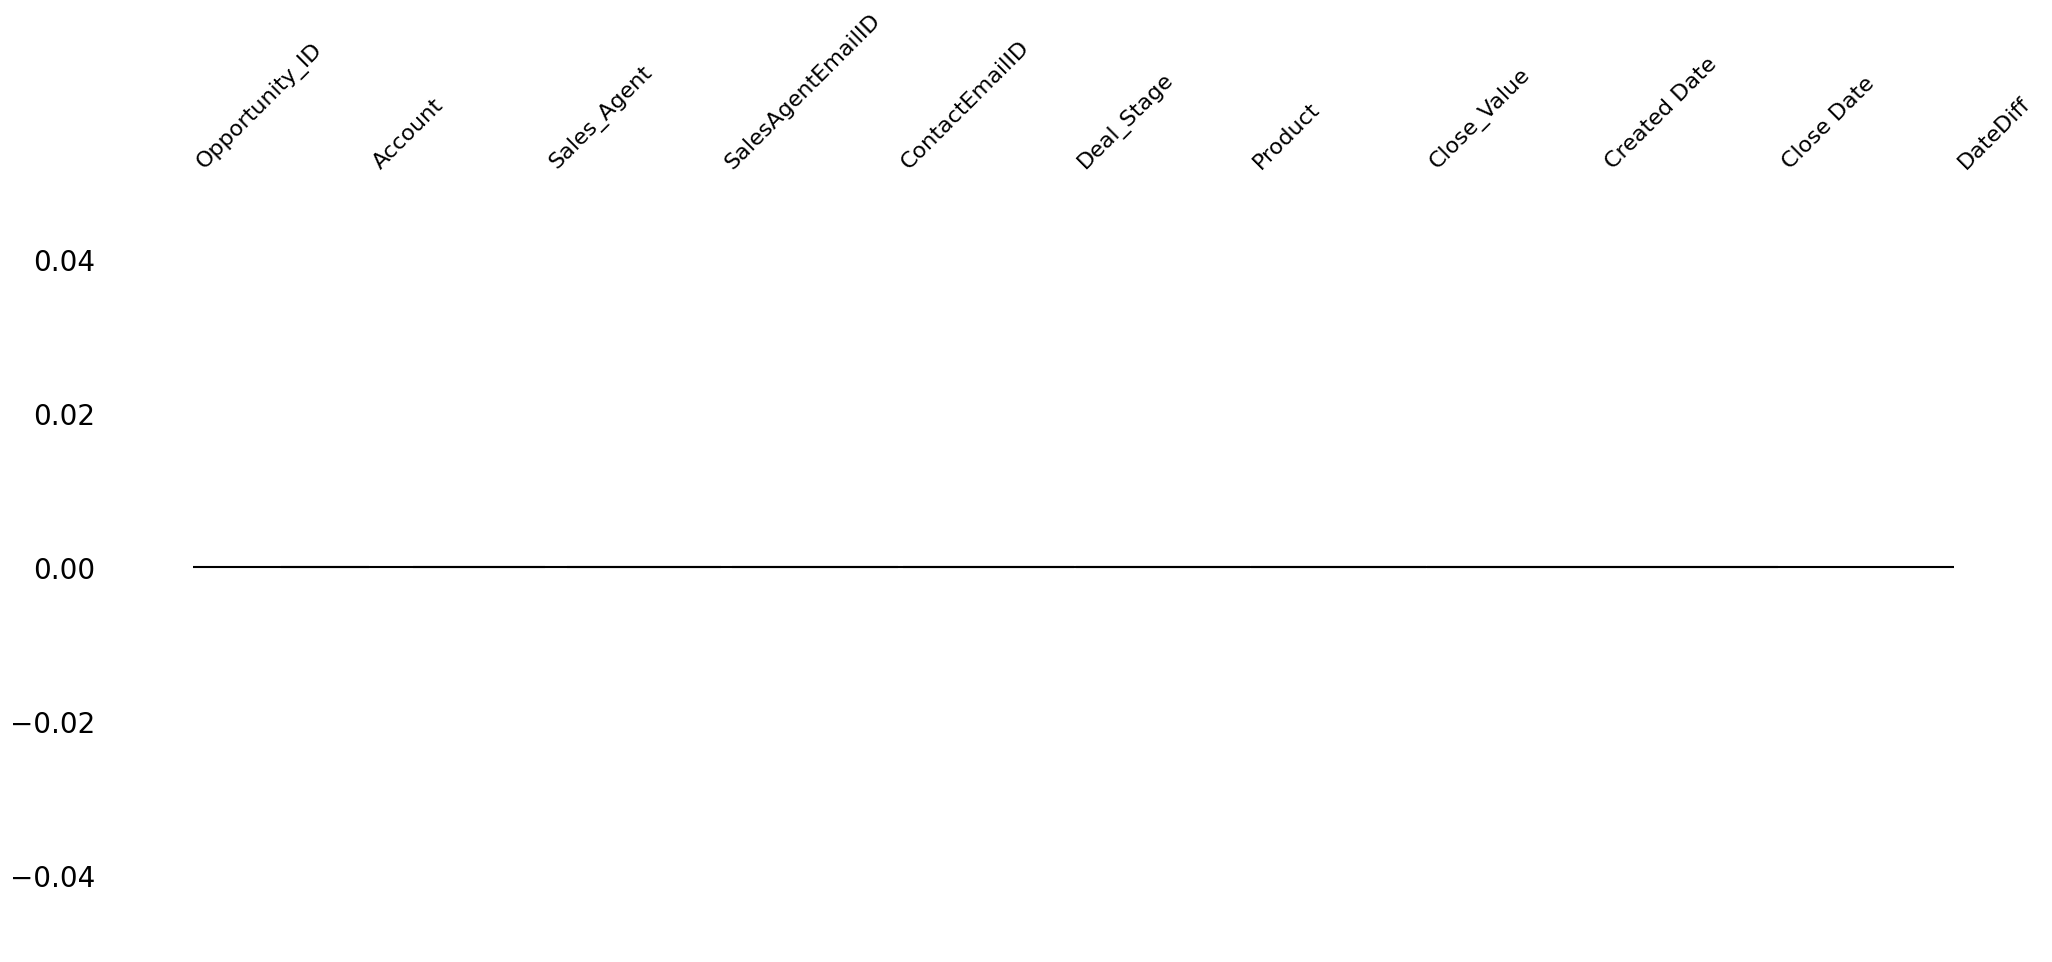

In [ ]:
ax = msno.dendrogram(data)

checking for missing values numerically


In [ ]:
data.describe()

,Close_Value,DateDiff
count,8800.000000,8800.000000
mean,1851.752614,316.713068
std,2153.724173,239.928180
min,38.000000,0.000000
25%,492.000000,121.000000
50%,1000.000000,250.000000
75%,3393.000000,491.250000
max,30288.000000,958.000000


checking inconsistency of numeric value

In [ ]:
data.isnull()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8795,False,False,False,False,False,False,False,False,False,False,False
8796,False,False,False,False,False,False,False,False,False,False,False
8797,False,False,False,False,False,False,False,False,False,False,False
8798,False,False,False,False,False,False,False,False,False,False,False


table to shows us the total number of missing values and also the percentage of missing values.

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Account,0,0.0
Opportunity_ID,0,0.0
Sales_Agent,0,0.0
SalesAgentEmailID,0,0.0
ContactEmailID,0,0.0
Deal_Stage,0,0.0
Product,0,0.0
Close_Value,0,0.0
Created Date,0,0.0
Close Date,0,0.0


**implementing not null**

 notnull() helps in finding the number of non-null values.

In [ ]:
data.notnull().sum().sort_values(ascending=False)

,0
Account,8800
Opportunity_ID,8800
Sales_Agent,8800
SalesAgentEmailID,8800
ContactEmailID,8800
Deal_Stage,8800
Product,8800
Close_Value,8800
Created Date,8800
Close Date,8800


# **Handling Missing values**

###**NUMERICAL VALUES**
**Deletion**


In [ ]:
data.dropna(subset = ['Sales_Agent'], axis = 0, how = 'any', inplace = True)

In [ ]:
 data.drop(['created date'], axis = 1, inplace = True)

KeyError: "['created date'] not found in axis"

### **Imputation**

By checking the skewness and presence of outliers in the data we can decide whether to to fill with mean or median.


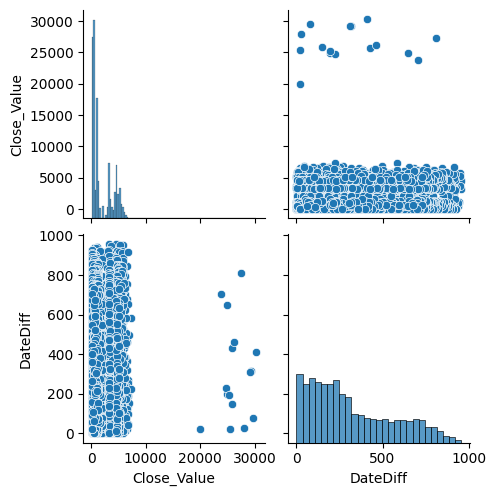

In [ ]:
columns = ['Close_Value','DateDiff']
sns.pairplot(data[columns])

using mean

In [ ]:
data['Close_Value'].fillna(data['Close_Value'].mean(), inplace = True)

<ipython-input-19-28a1c4d8b6c6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Close_Value'].fillna(data['Close_Value'].mean(), inplace = True)


In [ ]:
data['Close_Value'] = data['Close_Value'].fillna(data['Close_Value'].mean())

using median

In [ ]:
data['DateDiff'].fillna(data['DateDiff'].median(), inplace = True)

<ipython-input-21-81f10d22e594>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DateDiff'].fillna(data['DateDiff'].median(), inplace = True)


In [ ]:
data['DateDiff'] = data['DateDiff'].fillna(data['DateDiff'].median())


using mode

In [ ]:
data['Close_Value'].fillna((data['Close_Value'].mode()[0]), inplace=True)

<ipython-input-23-bb25a8a37e36>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Close_Value'].fillna((data['Close_Value'].mode()[0]), inplace=True)


In [ ]:
data['Close_Value'] = data['Close_Value'].fillna(data['Close_Value'].mode()[0])


### **CATEGORICAL VALUES**

In [ ]:
data['Deal_Stage'].value_counts()

,count
Deal_Stage,
Won,4238
Lost,2473
In Progress,2089


**using direct assign**

In [ ]:
data['Deal_Stage'] = data['Deal_Stage'].fillna('In Progress')


**using assignment method**

In [ ]:
data = data.assign(Deal_Stage=data['Deal_Stage'].fillna('In Progress'))


### **Predict the Missing values**

In [ ]:
data['Deal_Stage'] = data['Deal_Stage'].fillna(data['Deal_Stage'].mode()[0])

# **A word of caution**

In [ ]:
cat_data.head(20)

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,04-01-2016,24-05-2016,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,04-01-2016,02-11-2016,303
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,06-01-2016,07-12-2016,336
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,06-01-2016,11-09-2016,249
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,06-01-2016,18-09-2016,256
5,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180,07-01-2016,31-01-2016,24
6,Hatfan,PE84CX4O,Zane Levy,zane@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,517,08-01-2016,08-12-2016,335
7,Y-corporation,GIUUTBXM,Kary Hendrixson,kary@piedpiper.com,rosanne@y-corporation.com,Won,GTXPro,5539,10-01-2016,03-12-2016,328
8,Gogozoom,C20AVXN7,Darcel Schlecht,darcel@piedpiper.com,salina@gogozoom.com,Won,GTXPro,4359,10-01-2016,28-01-2016,18
9,Kinnamplus,VR9NYBOV,Garret Kinder,garret@piedpiper.com,monte@kinnamplus.com,Won,MG Special,41,11-01-2016,29-12-2016,353


In [ ]:
total = cat_data.isnull().sum().sort_values(ascending=False)
percent = ((cat_data.isnull().sum()/cat_data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
Account,0,0.0
Opportunity_ID,0,0.0
Sales_Agent,0,0.0
SalesAgentEmailID,0,0.0
ContactEmailID,0,0.0
Deal_Stage,0,0.0
Product,0,0.0
Close_Value,0,0.0
Created Date,0,0.0
Close Date,0,0.0


In [ ]:
cat_data['Account'].fillna("none", inplace = True)

<ipython-input-31-9f87aef96de5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_data['Account'].fillna("none", inplace = True)


In [ ]:
cat_data['Account'] = cat_data['Account'].fillna("none")


## loading the datas

In [ ]:

from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv('gdrive/My Drive/edab/sales-pipeline.csv')

In [ ]:
df.shape

(8800, 11)

In [ ]:
df.head(100)

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,04-01-2016,24-05-2016,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,04-01-2016,02-11-2016,303
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,06-01-2016,07-12-2016,336
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,06-01-2016,11-09-2016,249
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,06-01-2016,18-09-2016,256
...,...,...,...,...,...,...,...,...,...,...,...
95,Bubba Gump,V5OK4V5I,Cassey Cress,cassey@piedpiper.com,margarito@bubbagump.com,Won,GTX Basic,549,14-04-2016,12-07-2016,89
96,Finhigh,S1V8684Y,Marty Freudenburg,marty@piedpiper.com,mellie@finhigh.com,Lost,GTX Plus Basic,493,14-04-2016,20-07-2016,97
97,Sonron,ENB2XD8G,Maureen Marcano,maureen@piedpiper.com,ashlie@sonron.com,Won,GTX Plus Pro,4631,15-04-2016,02-06-2016,48
98,Xx-zobam,902REDPA,Daniell Hammack,daniell@piedpiper.com,vanessa@xx-zobam.com,Lost,GTXPro,300,15-04-2016,30-09-2016,168


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Account            8800 non-null   object
 1   Opportunity_ID     8800 non-null   object
 2   Sales_Agent        8800 non-null   object
 3   SalesAgentEmailID  8800 non-null   object
 4   ContactEmailID     8800 non-null   object
 5   Deal_Stage         8800 non-null   object
 6   Product            8800 non-null   object
 7   Close_Value        8800 non-null   int64 
 8   Created Date       8800 non-null   object
 9   Close Date         8800 non-null   object
 10  DateDiff           8800 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 756.4+ KB


In [ ]:
df.describe()

,Close_Value,DateDiff
count,8800.000000,8800.000000
mean,1851.752614,316.713068
std,2153.724173,239.928180
min,38.000000,0.000000
25%,492.000000,121.000000
50%,1000.000000,250.000000
75%,3393.000000,491.250000
max,30288.000000,958.000000


In [ ]:
print(df.columns)


Index(['Account', 'Opportunity_ID', 'Sales_Agent', 'SalesAgentEmailID',
       'ContactEmailID', 'Deal_Stage', 'Product', 'Close_Value',
       'Created Date', 'Close Date', 'DateDiff'],
      dtype='object')


# **UNIVARIATE ANALYSIS**



In [ ]:
df_Sales_Agent=df.loc[df['Account']=='Sales_Agent']
df_Close_Value=df.loc[df['Account']=='Close_Value']
df_DateDiff=df.loc[df['Account']=='DateDiff']

### **linear plot**

Text(0.5, 0, 'Deal_Stage')

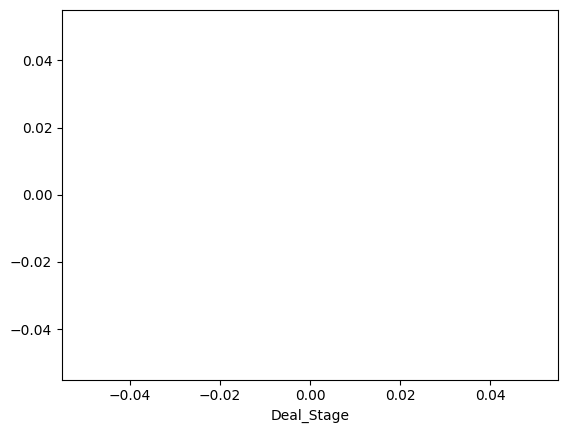

In [ ]:
plt.plot(df_Sales_Agent['Deal_Stage'], np.zeros_like(df_Sales_Agent['Deal_Stage']),'o')
plt.plot(df_Close_Value['Deal_Stage'], np.zeros_like(df_Close_Value['Deal_Stage']),'o')
plt.plot(df_DateDiff['Deal_Stage'], np.zeros_like(df_DateDiff['Deal_Stage']),'o')
plt.xlabel('Deal_Stage')

### **Bar Plot**

Text(0.5, 0, 'Account')

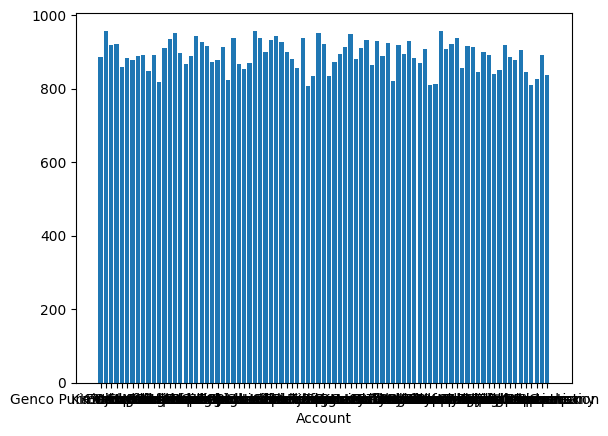

In [ ]:
plt.bar(df['Account'], df['DateDiff'])
plt.xlabel('Account')

### **Histogram**

In [ ]:
print(df.columns)


Index(['Account', 'Opportunity_ID', 'Sales_Agent', 'SalesAgentEmailID',
       'ContactEmailID', 'Deal_Stage', 'Product', 'Close_Value',
       'Created Date', 'Close Date', 'DateDiff'],
      dtype='object')


Text(0.5, 0, 'Deal_Stage')

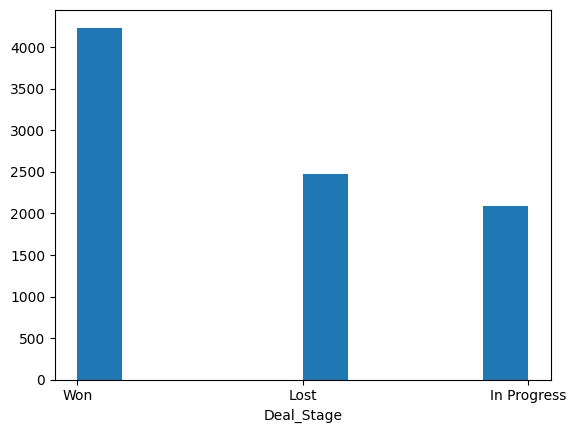

In [ ]:
plt.hist(df['Deal_Stage'])
plt.xlabel('Deal_Stage')


# **BIVARIATE ANALYSIS**

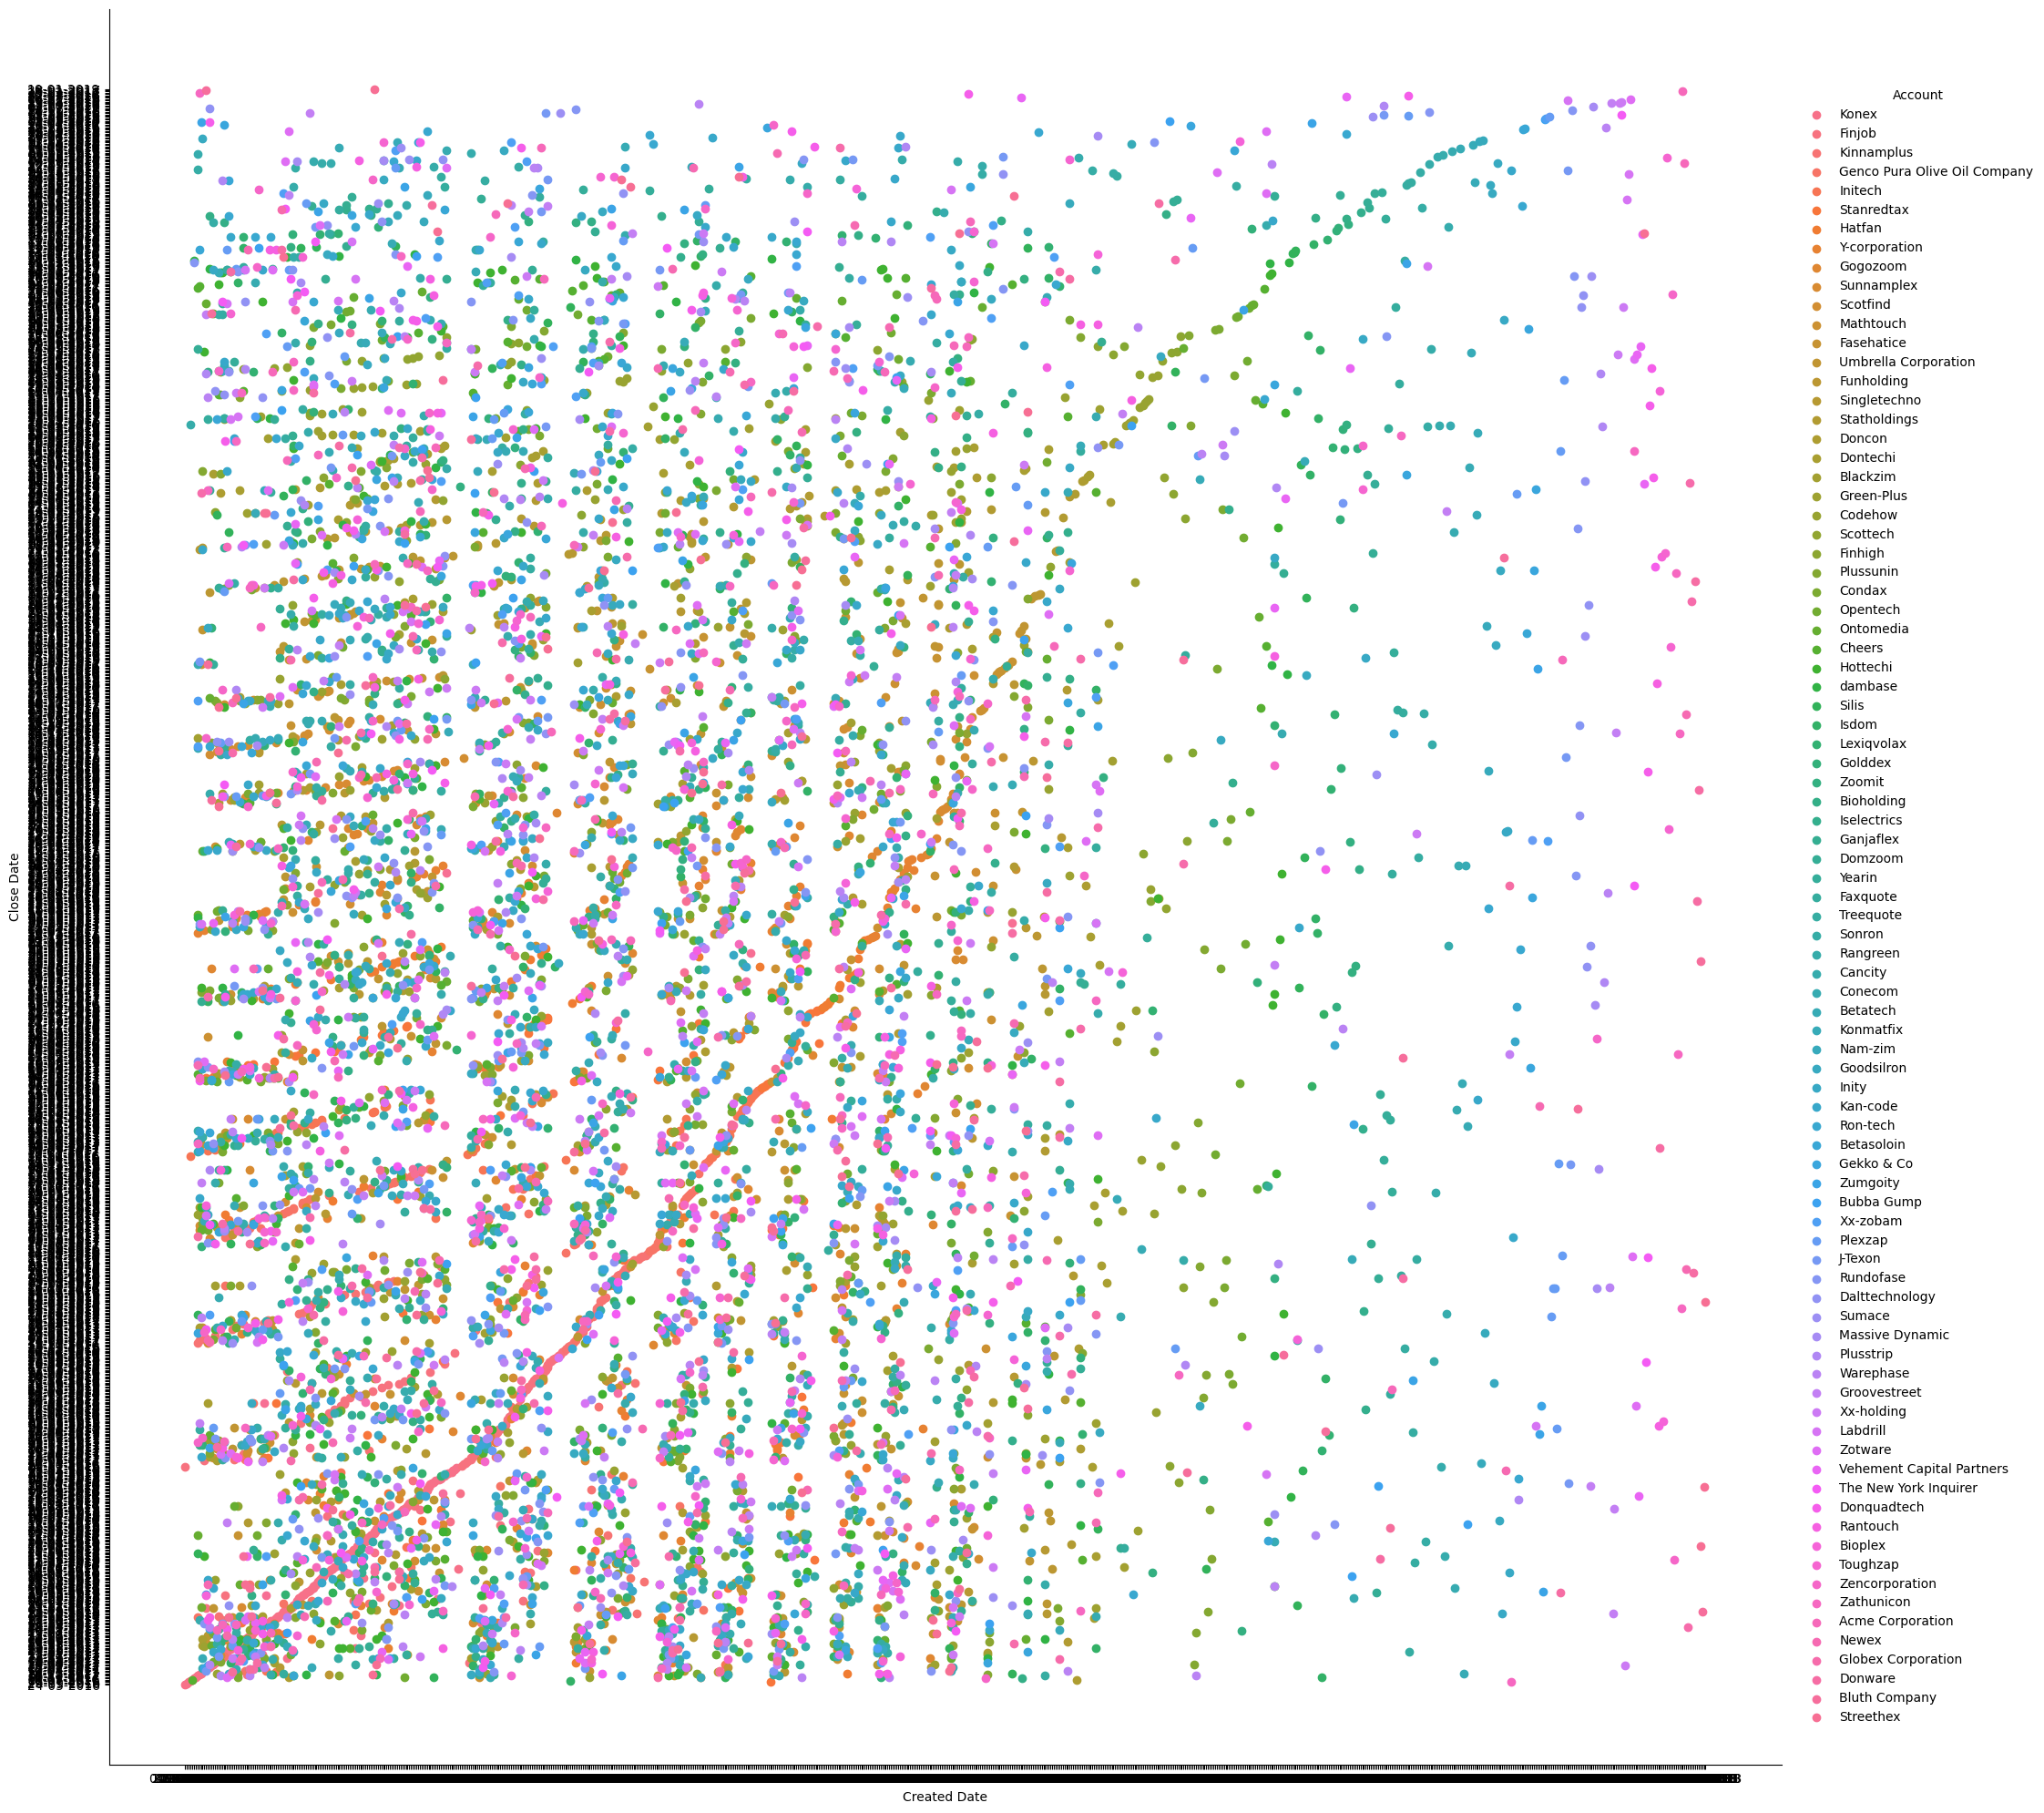

In [ ]:
sns.FacetGrid(df, hue="Account", height=20).map(plt.scatter, "Created Date", "Close Date").add_legend()


### **MULTI VARIATE**

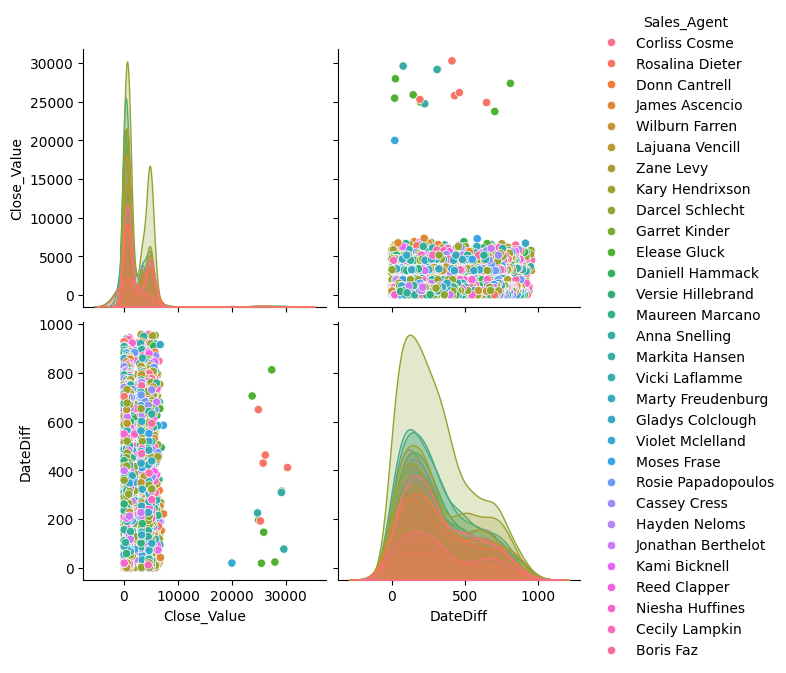

In [ ]:
sns.pairplot(df,hue="Sales_Agent",height=3)